<a href="https://colab.research.google.com/github/benasphy/hierarchical-clustering/blob/main/Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

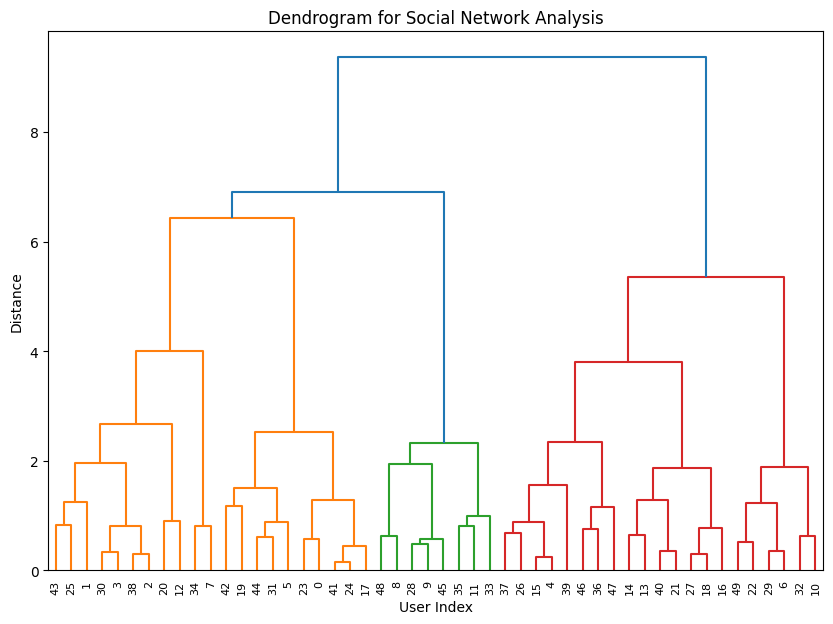

Clustered Social Network Data:
    interest_similarity  age_similarity  location_similarity  cluster
0             37.454012       96.958463             3.142919        3
1             95.071431       77.513282            63.641041        1
2             73.199394       93.949894            31.435598        1
3             59.865848       89.482735            50.857069        1
4             15.601864       59.789998            90.756647        0
5             15.599452       92.187424            24.929223        3
6              5.808361        8.849250            41.038292        0
7             86.617615       19.598286            75.555114        1
8             60.111501        4.522729            22.879817        2
9             70.807258       32.533033             7.697991        2
10             2.058449       38.867729            28.975145        0
11            96.990985       27.134903            16.122129        2
12            83.244264       82.873751            92.96976

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate synthetic social network data
# Features could represent different social attributes, like interests, age, and location
np.random.seed(42)
n_users = 50

# Randomly generating 3 main features: "interest similarity", "age similarity", "location similarity"
data = {
    "interest_similarity": np.random.rand(n_users) * 100,
    "age_similarity": np.random.rand(n_users) * 100,
    "location_similarity": np.random.rand(n_users) * 100,
}

df = pd.DataFrame(data)

# Standardize the data for better clustering performance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform hierarchical clustering
# Here we specify the number of clusters based on what we want
n_clusters = 4
# Remove the 'affinity' argument when using 'ward' linkage
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['cluster'] = hc.fit_predict(df_scaled)

# Visualize the hierarchical clustering as a dendrogram
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Social Network Analysis')
plt.xlabel('User Index')
plt.ylabel('Distance')
plt.show()

# Display the clustered data
print("Clustered Social Network Data:")
print(df)